# Data Scraping and Cleaning

### Extract Data from Basketball Reference

In [2]:
   pip install html5lib

Note: you may need to restart the kernel to use updated packages.


In [3]:
import requests
from bs4 import BeautifulSoup 
import pandas as pd


## Scraping Brunson's Last 5 Games Stats

In [4]:
def get_last_5_games(url, table_id):
    try:
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')

        stats_table = soup.find('table', {'id': table_id})
        if stats_table is None:
            print(f"Table with ID '{table_id}' not found.")
            return pd.DataFrame()
        
        last5_stats = pd.read_html(str(stats_table))[0]
        return last5_stats
    
    except Exception as e:
        print(f"Error retrieving {table_id} data:", e)
        return pd.DataFrame()
    
url = "https://www.basketball-reference.com/players/b/brunsja01.html"
table_id = "last5"

last5_df = get_last_5_games(url, table_id)
last5_df
    

/var/folders/rj/3yvmqxnj3d17zpgh8wpywxvr0000gn/T/ipykernel_5500/1454390191.py:11: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  last5_stats = pd.read_html(str(stats_table))[0]


,Date,Team,Unnamed: 2,Opp,Result,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,2024-11-10,NYK,@,IND,L 121-132,*,41,11,17,0.647,...,6,6,10,0,0,3,4,33,28.9,-8
1,2024-11-08,NYK,NaN,MIL,W 116-94,*,32,6,14,0.429,...,1,2,9,1,0,0,2,15,14.7,28
2,2024-11-06,NYK,@,ATL,L 116-121,*,37,8,18,0.444,...,3,3,4,0,0,3,3,21,10.7,-5
3,2024-11-04,NYK,@,HOU,L 97-109,*,42,9,24,0.375,...,2,3,8,1,0,1,2,29,21.9,-8
4,2024-11-01,NYK,@,DET,W 128-98,*,31,14,22,0.636,...,1,1,5,2,0,2,2,36,28.4,23


In [5]:
last5_df.rename(columns={'Result': 'W/L'}, inplace=True)
last5_df.rename(columns={'Unnamed: 2': 'Home/Away'}, inplace=True)

In [6]:
last5_df['Home/Away'] = last5_df['Home/Away'].astype(str)

In [7]:
import numpy as np

In [8]:
last5_df['Home/Away'] = last5_df['Home/Away'].replace(np.nan, 'Home')
last5_df['Home/Away'] = last5_df['Home/Away'].replace('@', 'Away')
last5_df

,Date,Team,Home/Away,Opp,W/L,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,2024-11-10,NYK,Away,IND,L 121-132,*,41,11,17,0.647,...,6,6,10,0,0,3,4,33,28.9,-8
1,2024-11-08,NYK,nan,MIL,W 116-94,*,32,6,14,0.429,...,1,2,9,1,0,0,2,15,14.7,28
2,2024-11-06,NYK,Away,ATL,L 116-121,*,37,8,18,0.444,...,3,3,4,0,0,3,3,21,10.7,-5
3,2024-11-04,NYK,Away,HOU,L 97-109,*,42,9,24,0.375,...,2,3,8,1,0,1,2,29,21.9,-8
4,2024-11-01,NYK,Away,DET,W 128-98,*,31,14,22,0.636,...,1,1,5,2,0,2,2,36,28.4,23


In [9]:
last5_df['Home/Away'].replace('nan', 'Home', inplace=True)

/var/folders/rj/3yvmqxnj3d17zpgh8wpywxvr0000gn/T/ipykernel_5500/3201721547.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  last5_df['Home/Away'].replace('nan', 'Home', inplace=True)


In [10]:
last5_df

,Date,Team,Home/Away,Opp,W/L,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,2024-11-10,NYK,Away,IND,L 121-132,*,41,11,17,0.647,...,6,6,10,0,0,3,4,33,28.9,-8
1,2024-11-08,NYK,Home,MIL,W 116-94,*,32,6,14,0.429,...,1,2,9,1,0,0,2,15,14.7,28
2,2024-11-06,NYK,Away,ATL,L 116-121,*,37,8,18,0.444,...,3,3,4,0,0,3,3,21,10.7,-5
3,2024-11-04,NYK,Away,HOU,L 97-109,*,42,9,24,0.375,...,2,3,8,1,0,1,2,29,21.9,-8
4,2024-11-01,NYK,Away,DET,W 128-98,*,31,14,22,0.636,...,1,1,5,2,0,2,2,36,28.4,23


In [11]:
last5_df.drop(columns= ['GS'], inplace=True)

In [12]:
last5_df

,Date,Team,Home/Away,Opp,W/L,MP,FG,FGA,FG%,3P,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,2024-11-10,NYK,Away,IND,L 121-132,41,11,17,0.647,1,...,6,6,10,0,0,3,4,33,28.9,-8
1,2024-11-08,NYK,Home,MIL,W 116-94,32,6,14,0.429,0,...,1,2,9,1,0,0,2,15,14.7,28
2,2024-11-06,NYK,Away,ATL,L 116-121,37,8,18,0.444,4,...,3,3,4,0,0,3,3,21,10.7,-5
3,2024-11-04,NYK,Away,HOU,L 97-109,42,9,24,0.375,2,...,2,3,8,1,0,1,2,29,21.9,-8
4,2024-11-01,NYK,Away,DET,W 128-98,31,14,22,0.636,6,...,1,1,5,2,0,2,2,36,28.4,23


In [13]:
# Save to csv
last5_df.to_csv('./last5_games.csv', index=False)


## Scraping Brunson's 2022-23 Season Stats

In [14]:
def get_22_23_season_stats(url, table_id):
    try:
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')

        stats_table = soup.find('table', {'id': table_id})
        if stats_table is None:
            print(f"Table with ID '{table_id}' not found.")
            return pd.DataFrame()
        
        season_stats = pd.read_html(str(stats_table))[0]

        return season_stats
    
    except Exception as e:
        print(f"Error retrieving 22-23 season data:", e)
        return pd.DataFrame()

url = f"https://www.basketball-reference.com/players/b/brunsja01/gamelog/2023/"
table_id = "pgl_basic"

season_22_23_df = get_22_23_season_stats(url, table_id)

season_22_23_df


/var/folders/rj/3yvmqxnj3d17zpgh8wpywxvr0000gn/T/ipykernel_5500/634109390.py:11: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  season_stats = pd.read_html(str(stats_table))[0]


,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,1,2022-10-19,26-049,NYK,@,MEM,L (-3),1,36:05,...,4,6,9,0,0,0,3,15,12.9,+3
1,2,2,2022-10-21,26-051,NYK,NaN,DET,W (+24),1,28:22,...,2,2,6,1,0,0,2,17,15.9,+3
2,3,3,2022-10-24,26-054,NYK,NaN,ORL,W (+13),1,33:02,...,3,3,6,2,0,3,5,21,15.1,+17
3,4,4,2022-10-26,26-056,NYK,NaN,CHO,W (+3),1,40:35,...,7,7,13,1,1,3,2,27,29.6,+7
4,5,5,2022-10-28,26-058,NYK,@,MIL,L (-11),1,33:08,...,3,3,2,1,0,3,3,13,5.1,-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,79,68,2023-04-02,26-214,NYK,NaN,WAS,W (+9),1,39:12,...,3,3,8,3,0,5,2,27,20.7,+19
82,80,NaN,2023-04-05,26-217,NYK,@,IND,W (+9),Inactive,Inactive,...,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive
83,Rk,G,Date,Age,Tm,NaN,Opp,NaN,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
84,81,NaN,2023-04-07,26-219,NYK,@,NOP,L (-8),Inactive,Inactive,...,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive


## Scraping Brunson's 2023-24 Season Stats


In [15]:
def get_23_24_season_stats(url, table_id):
    
    try:
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')

        stats_table = soup.find('table', {'id': table_id})
        if stats_table is None:
            print(f"Table with ID '{table_id}' not found.")
            return pd.DataFrame()

        # Moved this line outside the if block
        season_stats = pd.read_html(str(stats_table))[0]

        return season_stats
    
    except Exception as e:
        print(f"Error retrieving 23-24 season data:", e)
        return pd.DataFrame()

url = f"https://www.basketball-reference.com/players/b/brunsja01/gamelog/2024"
table_id = "pgl_basic"
season_23_24_df = get_23_24_season_stats(url, table_id)

season_23_24_df


/var/folders/rj/3yvmqxnj3d17zpgh8wpywxvr0000gn/T/ipykernel_5500/798683490.py:13: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  season_stats = pd.read_html(str(stats_table))[0]


,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,1,2023-10-25,27-055,NYK,NaN,BOS,L (-4),1,32:35,...,2,3,6,3,0,2,3,15,7.6,-9
1,2,2,2023-10-27,27-057,NYK,@,ATL,W (+6),1,32:42,...,3,3,5,0,0,2,1,31,22.3,+13
2,3,3,2023-10-28,27-058,NYK,@,NOP,L (-9),1,30:35,...,3,4,5,0,0,1,2,14,8.7,-9
3,4,4,2023-10-31,27-061,NYK,@,CLE,W (+18),1,33:40,...,5,5,2,2,0,5,1,19,9.7,+21
4,5,5,2023-11-01,27-062,NYK,NaN,CLE,L (-6),1,38:36,...,3,4,4,0,0,1,4,24,12.5,-6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,79,74,2024-04-09,27-222,NYK,@,CHI,W (+11),1,42:26,...,3,3,8,1,0,1,0,45,39.9,+9
82,80,75,2024-04-11,27-224,NYK,@,BOS,W (+9),1,30:02,...,2,2,4,0,0,2,2,39,28.7,+28
83,Rk,G,Date,Age,Tm,NaN,Opp,NaN,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
84,81,76,2024-04-12,27-225,NYK,NaN,BRK,W (+4),1,36:32,...,1,1,11,1,0,0,2,30,24.7,+7


In [16]:
season_23_24_df.to_csv('./season_23_24_stats.csv', index=False)

In [17]:
def get_21_22_season_stats(url, table_id):
    
    try:
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')

        stats_table = soup.find('table', {'id': table_id})
        if stats_table is None:
            print(f"Table with ID '{table_id}' not found.")
            return pd.DataFrame()

        # Moved this line outside the if block
        season_stats = pd.read_html(str(stats_table))[0]

        return season_stats
    
    except Exception as e:
        print(f"Error retrieving 23-24 season data:", e)
        return pd.DataFrame()

url = f"https://www.basketball-reference.com/players/b/brunsja01/gamelog/2022/"
table_id = "pgl_basic"
season_21_22_df = get_21_22_season_stats(url, table_id)

season_21_22_df


/var/folders/rj/3yvmqxnj3d17zpgh8wpywxvr0000gn/T/ipykernel_5500/2955285888.py:13: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  season_stats = pd.read_html(str(stats_table))[0]


,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,1,2021-10-21,25-051,DAL,@,ATL,L (-26),0,25:40,...,3,3,3,0,0,0,2,17,12.9,-8
1,2,2,2021-10-23,25-053,DAL,@,TOR,W (+8),0,22:42,...,4,6,4,1,0,1,3,5,3.7,+7
2,3,3,2021-10-26,25-056,DAL,NaN,HOU,W (+10),0,28:20,...,3,4,11,1,0,2,3,11,14.1,+7
3,4,4,2021-10-28,25-058,DAL,NaN,SAS,W (+5),0,30:06,...,6,7,5,0,0,0,2,19,16.1,+21
4,5,5,2021-10-29,25-059,DAL,@,DEN,L (-31),0,19:25,...,3,3,3,0,0,1,1,4,0.8,-7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,79,76,2022-04-03,25-215,DAL,@,MIL,W (+6),1,36:14,...,3,3,1,1,0,1,1,15,9.8,+6
82,80,77,2022-04-06,25-218,DAL,@,DET,W (+18),1,34:37,...,5,6,3,1,0,0,3,24,20.8,+22
83,Rk,G,Date,Age,Tm,NaN,Opp,NaN,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
84,81,78,2022-04-08,25-220,DAL,NaN,POR,W (+50),1,22:19,...,2,3,2,0,0,0,1,9,7.9,+18


In [18]:
def get_20_21_season_stats(url, table_id):
    
    try:
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')

        stats_table = soup.find('table', {'id': table_id})
        if stats_table is None:
            print(f"Table with ID '{table_id}' not found.")
            return pd.DataFrame()

        # Moved this line outside the if block
        season_stats = pd.read_html(str(stats_table))[0]

        return season_stats
    
    except Exception as e:
        print(f"Error retrieving 23-24 season data:", e)
        return pd.DataFrame()

url = f"https://www.basketball-reference.com/players/b/brunsja01/gamelog/2021/"
table_id = "pgl_basic"
season_20_21_df = get_20_21_season_stats(url, table_id)

season_20_21_df


/var/folders/rj/3yvmqxnj3d17zpgh8wpywxvr0000gn/T/ipykernel_5500/3225571562.py:13: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  season_stats = pd.read_html(str(stats_table))[0]


,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,1,2020-12-23,24-114,DAL,@,PHO,L (-4),0,18:11,...,2,2,4,0,0,3,2,12,8.0,+3
1,2,2,2020-12-25,24-116,DAL,@,LAL,L (-23),0,13:52,...,2,2,1,0,0,3,2,4,-1.2,-9
2,3,3,2020-12-27,24-118,DAL,@,LAC,W (+51),0,13:19,...,2,2,3,0,0,0,0,11,11.1,+20
3,4,4,2020-12-30,24-121,DAL,NaN,CHO,L (-19),0,20:16,...,4,4,4,1,0,1,0,16,12.1,+4
4,5,5,2021-01-01,24-123,DAL,NaN,MIA,W (+10),0,12:11,...,3,3,2,2,0,1,1,2,1.8,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,68,64,2021-05-09,24-251,DAL,@,CLE,W (+27),0,18:38,...,1,1,7,2,0,1,1,13,17.3,+26
71,69,65,2021-05-11,24-253,DAL,@,MEM,L (-29),0,24:38,...,3,3,3,1,0,0,0,15,13.7,-13
72,70,66,2021-05-12,24-254,DAL,NaN,NOP,W (+18),0,18:14,...,3,3,6,0,0,0,3,5,5.7,+13
73,71,67,2021-05-14,24-256,DAL,NaN,TOR,W (+4),0,24:52,...,5,5,4,0,1,2,0,19,17.5,+4


In [19]:
#Combine 2020-21 and 2021-22 season stats

joined_stats = pd.concat([season_20_21_df, season_21_22_df])
joined_stats

,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,1,2020-12-23,24-114,DAL,@,PHO,L (-4),0,18:11,...,2,2,4,0,0,3,2,12,8.0,+3
1,2,2,2020-12-25,24-116,DAL,@,LAL,L (-23),0,13:52,...,2,2,1,0,0,3,2,4,-1.2,-9
2,3,3,2020-12-27,24-118,DAL,@,LAC,W (+51),0,13:19,...,2,2,3,0,0,0,0,11,11.1,+20
3,4,4,2020-12-30,24-121,DAL,NaN,CHO,L (-19),0,20:16,...,4,4,4,1,0,1,0,16,12.1,+4
4,5,5,2021-01-01,24-123,DAL,NaN,MIA,W (+10),0,12:11,...,3,3,2,2,0,1,1,2,1.8,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,79,76,2022-04-03,25-215,DAL,@,MIL,W (+6),1,36:14,...,3,3,1,1,0,1,1,15,9.8,+6
82,80,77,2022-04-06,25-218,DAL,@,DET,W (+18),1,34:37,...,5,6,3,1,0,0,3,24,20.8,+22
83,Rk,G,Date,Age,Tm,NaN,Opp,NaN,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
84,81,78,2022-04-08,25-220,DAL,NaN,POR,W (+50),1,22:19,...,2,3,2,0,0,0,1,9,7.9,+18


First combine the 22-23 and 23-24 season stats

In [20]:

combined_stats_df = pd.concat([season_22_23_df, season_23_24_df])
combined_stats_df

,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,1,2022-10-19,26-049,NYK,@,MEM,L (-3),1,36:05,...,4,6,9,0,0,0,3,15,12.9,+3
1,2,2,2022-10-21,26-051,NYK,NaN,DET,W (+24),1,28:22,...,2,2,6,1,0,0,2,17,15.9,+3
2,3,3,2022-10-24,26-054,NYK,NaN,ORL,W (+13),1,33:02,...,3,3,6,2,0,3,5,21,15.1,+17
3,4,4,2022-10-26,26-056,NYK,NaN,CHO,W (+3),1,40:35,...,7,7,13,1,1,3,2,27,29.6,+7
4,5,5,2022-10-28,26-058,NYK,@,MIL,L (-11),1,33:08,...,3,3,2,1,0,3,3,13,5.1,-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,79,74,2024-04-09,27-222,NYK,@,CHI,W (+11),1,42:26,...,3,3,8,1,0,1,0,45,39.9,+9
82,80,75,2024-04-11,27-224,NYK,@,BOS,W (+9),1,30:02,...,2,2,4,0,0,2,2,39,28.7,+28
83,Rk,G,Date,Age,Tm,NaN,Opp,NaN,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
84,81,76,2024-04-12,27-225,NYK,NaN,BRK,W (+4),1,36:32,...,1,1,11,1,0,0,2,30,24.7,+7


In [21]:
combined_stats_df = pd.concat([combined_stats_df, joined_stats])
combined_stats_df

,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,1,2022-10-19,26-049,NYK,@,MEM,L (-3),1,36:05,...,4,6,9,0,0,0,3,15,12.9,+3
1,2,2,2022-10-21,26-051,NYK,NaN,DET,W (+24),1,28:22,...,2,2,6,1,0,0,2,17,15.9,+3
2,3,3,2022-10-24,26-054,NYK,NaN,ORL,W (+13),1,33:02,...,3,3,6,2,0,3,5,21,15.1,+17
3,4,4,2022-10-26,26-056,NYK,NaN,CHO,W (+3),1,40:35,...,7,7,13,1,1,3,2,27,29.6,+7
4,5,5,2022-10-28,26-058,NYK,@,MIL,L (-11),1,33:08,...,3,3,2,1,0,3,3,13,5.1,-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,79,76,2022-04-03,25-215,DAL,@,MIL,W (+6),1,36:14,...,3,3,1,1,0,1,1,15,9.8,+6
82,80,77,2022-04-06,25-218,DAL,@,DET,W (+18),1,34:37,...,5,6,3,1,0,0,3,24,20.8,+22
83,Rk,G,Date,Age,Tm,NaN,Opp,NaN,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
84,81,78,2022-04-08,25-220,DAL,NaN,POR,W (+50),1,22:19,...,2,3,2,0,0,0,1,9,7.9,+18


In [22]:
combined_stats_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 85
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Rk          333 non-null    object
 1   G           307 non-null    object
 2   Date        333 non-null    object
 3   Age         333 non-null    object
 4   Tm          333 non-null    object
 5   Unnamed: 5  159 non-null    object
 6   Opp         333 non-null    object
 7   Unnamed: 7  318 non-null    object
 8   GS          333 non-null    object
 9   MP          333 non-null    object
 10  FG          333 non-null    object
 11  FGA         333 non-null    object
 12  FG%         333 non-null    object
 13  3P          333 non-null    object
 14  3PA         333 non-null    object
 15  3P%         323 non-null    object
 16  FT          333 non-null    object
 17  FTA         333 non-null    object
 18  FT%         287 non-null    object
 19  ORB         333 non-null    object
 20  DRB         333 

## Cleaning and Preprocessing Data

Get rid of unnecessary columns

In [23]:
combined_stats_df

,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,1,2022-10-19,26-049,NYK,@,MEM,L (-3),1,36:05,...,4,6,9,0,0,0,3,15,12.9,+3
1,2,2,2022-10-21,26-051,NYK,NaN,DET,W (+24),1,28:22,...,2,2,6,1,0,0,2,17,15.9,+3
2,3,3,2022-10-24,26-054,NYK,NaN,ORL,W (+13),1,33:02,...,3,3,6,2,0,3,5,21,15.1,+17
3,4,4,2022-10-26,26-056,NYK,NaN,CHO,W (+3),1,40:35,...,7,7,13,1,1,3,2,27,29.6,+7
4,5,5,2022-10-28,26-058,NYK,@,MIL,L (-11),1,33:08,...,3,3,2,1,0,3,3,13,5.1,-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,79,76,2022-04-03,25-215,DAL,@,MIL,W (+6),1,36:14,...,3,3,1,1,0,1,1,15,9.8,+6
82,80,77,2022-04-06,25-218,DAL,@,DET,W (+18),1,34:37,...,5,6,3,1,0,0,3,24,20.8,+22
83,Rk,G,Date,Age,Tm,NaN,Opp,NaN,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
84,81,78,2022-04-08,25-220,DAL,NaN,POR,W (+50),1,22:19,...,2,3,2,0,0,0,1,9,7.9,+18


In [24]:

combined_stats_df = combined_stats_df.rename(columns={'Unnamed: 5':'Home/Away', 'Unnamed: 7':'W/L'})
combined_stats_df.head()

,Rk,G,Date,Age,Tm,Home/Away,Opp,W/L,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,1,2022-10-19,26-049,NYK,@,MEM,L (-3),1,36:05,...,4,6,9,0,0,0,3,15,12.9,+3
1,2,2,2022-10-21,26-051,NYK,NaN,DET,W (+24),1,28:22,...,2,2,6,1,0,0,2,17,15.9,+3
2,3,3,2022-10-24,26-054,NYK,NaN,ORL,W (+13),1,33:02,...,3,3,6,2,0,3,5,21,15.1,+17
3,4,4,2022-10-26,26-056,NYK,NaN,CHO,W (+3),1,40:35,...,7,7,13,1,1,3,2,27,29.6,+7
4,5,5,2022-10-28,26-058,NYK,@,MIL,L (-11),1,33:08,...,3,3,2,1,0,3,3,13,5.1,-19


In [25]:
# Change '@' to 'Away' and Naan to Home
combined_stats_df['Home/Away'] = combined_stats_df['Home/Away'].replace('@', 'Away')
combined_stats_df['Home/Away'] = combined_stats_df['Home/Away'].replace(np.nan, 'Home')
combined_stats_df.head()

,Rk,G,Date,Age,Tm,Home/Away,Opp,W/L,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,1,2022-10-19,26-049,NYK,Away,MEM,L (-3),1,36:05,...,4,6,9,0,0,0,3,15,12.9,+3
1,2,2,2022-10-21,26-051,NYK,Home,DET,W (+24),1,28:22,...,2,2,6,1,0,0,2,17,15.9,+3
2,3,3,2022-10-24,26-054,NYK,Home,ORL,W (+13),1,33:02,...,3,3,6,2,0,3,5,21,15.1,+17
3,4,4,2022-10-26,26-056,NYK,Home,CHO,W (+3),1,40:35,...,7,7,13,1,1,3,2,27,29.6,+7
4,5,5,2022-10-28,26-058,NYK,Away,MIL,L (-11),1,33:08,...,3,3,2,1,0,3,3,13,5.1,-19


In [26]:
combined_stats_df = combined_stats_df.drop(columns=['Age', 'Rk', 'GS'])
combined_stats_df.head()

,G,Date,Tm,Home/Away,Opp,W/L,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,2022-10-19,NYK,Away,MEM,L (-3),36:05,7,18,.389,...,4,6,9,0,0,0,3,15,12.9,+3
1,2,2022-10-21,NYK,Home,DET,W (+24),28:22,6,11,.545,...,2,2,6,1,0,0,2,17,15.9,+3
2,3,2022-10-24,NYK,Home,ORL,W (+13),33:02,8,16,.500,...,3,3,6,2,0,3,5,21,15.1,+17
3,4,2022-10-26,NYK,Home,CHO,W (+3),40:35,10,15,.667,...,7,7,13,1,1,3,2,27,29.6,+7
4,5,2022-10-28,NYK,Away,MIL,L (-11),33:08,3,10,.300,...,3,3,2,1,0,3,3,13,5.1,-19


Remove the headers that repeat inside the dataframe

In [27]:
pd.set_option('display.max_rows', 10)
combined_stats_df.reset_index(drop=True)

,G,Date,Tm,Home/Away,Opp,W/L,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,2022-10-19,NYK,Away,MEM,L (-3),36:05,7,18,.389,...,4,6,9,0,0,0,3,15,12.9,+3
1,2,2022-10-21,NYK,Home,DET,W (+24),28:22,6,11,.545,...,2,2,6,1,0,0,2,17,15.9,+3
2,3,2022-10-24,NYK,Home,ORL,W (+13),33:02,8,16,.500,...,3,3,6,2,0,3,5,21,15.1,+17
3,4,2022-10-26,NYK,Home,CHO,W (+3),40:35,10,15,.667,...,7,7,13,1,1,3,2,27,29.6,+7
4,5,2022-10-28,NYK,Away,MIL,L (-11),33:08,3,10,.300,...,3,3,2,1,0,3,3,13,5.1,-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,76,2022-04-03,DAL,Away,MIL,W (+6),36:14,5,12,.417,...,3,3,1,1,0,1,1,15,9.8,+6
329,77,2022-04-06,DAL,Away,DET,W (+18),34:37,9,15,.600,...,5,6,3,1,0,0,3,24,20.8,+22
330,G,Date,Tm,Home,Opp,NaN,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
331,78,2022-04-08,DAL,Home,POR,W (+50),22:19,2,6,.333,...,2,3,2,0,0,0,1,9,7.9,+18


In [28]:
combined_stats_df['G'] = combined_stats_df['G'].astype(str)

In [29]:
combined_stats_df

,G,Date,Tm,Home/Away,Opp,W/L,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,2022-10-19,NYK,Away,MEM,L (-3),36:05,7,18,.389,...,4,6,9,0,0,0,3,15,12.9,+3
1,2,2022-10-21,NYK,Home,DET,W (+24),28:22,6,11,.545,...,2,2,6,1,0,0,2,17,15.9,+3
2,3,2022-10-24,NYK,Home,ORL,W (+13),33:02,8,16,.500,...,3,3,6,2,0,3,5,21,15.1,+17
3,4,2022-10-26,NYK,Home,CHO,W (+3),40:35,10,15,.667,...,7,7,13,1,1,3,2,27,29.6,+7
4,5,2022-10-28,NYK,Away,MIL,L (-11),33:08,3,10,.300,...,3,3,2,1,0,3,3,13,5.1,-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,76,2022-04-03,DAL,Away,MIL,W (+6),36:14,5,12,.417,...,3,3,1,1,0,1,1,15,9.8,+6
82,77,2022-04-06,DAL,Away,DET,W (+18),34:37,9,15,.600,...,5,6,3,1,0,0,3,24,20.8,+22
83,G,Date,Tm,Home,Opp,NaN,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
84,78,2022-04-08,DAL,Home,POR,W (+50),22:19,2,6,.333,...,2,3,2,0,0,0,1,9,7.9,+18


In [30]:
combined_stats_df[combined_stats_df['G'] == 'G']
# There are 15 rows with the headers in them



,G,Date,Tm,Home/Away,Opp,W/L,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
20,G,Date,Tm,Home,Opp,NaN,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
41,G,Date,Tm,Home,Opp,NaN,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
62,G,Date,Tm,Home,Opp,NaN,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
83,G,Date,Tm,Home,Opp,NaN,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
20,G,Date,Tm,Home,Opp,NaN,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,G,Date,Tm,Home,Opp,NaN,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
20,G,Date,Tm,Home,Opp,NaN,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
41,G,Date,Tm,Home,Opp,NaN,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
62,G,Date,Tm,Home,Opp,NaN,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-


In [31]:
# Drop the rows with the repeated headers
combined_stats_df = combined_stats_df[combined_stats_df['G'] != 'G']
combined_stats_df.reset_index(drop=True)
combined_stats_df

,G,Date,Tm,Home/Away,Opp,W/L,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,2022-10-19,NYK,Away,MEM,L (-3),36:05,7,18,.389,...,4,6,9,0,0,0,3,15,12.9,+3
1,2,2022-10-21,NYK,Home,DET,W (+24),28:22,6,11,.545,...,2,2,6,1,0,0,2,17,15.9,+3
2,3,2022-10-24,NYK,Home,ORL,W (+13),33:02,8,16,.500,...,3,3,6,2,0,3,5,21,15.1,+17
3,4,2022-10-26,NYK,Home,CHO,W (+3),40:35,10,15,.667,...,7,7,13,1,1,3,2,27,29.6,+7
4,5,2022-10-28,NYK,Away,MIL,L (-11),33:08,3,10,.300,...,3,3,2,1,0,3,3,13,5.1,-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,75,2022-04-01,DAL,Away,WAS,L (-32),32:08,9,13,.692,...,5,5,2,1,0,1,3,21,17.2,-29
81,76,2022-04-03,DAL,Away,MIL,W (+6),36:14,5,12,.417,...,3,3,1,1,0,1,1,15,9.8,+6
82,77,2022-04-06,DAL,Away,DET,W (+18),34:37,9,15,.600,...,5,6,3,1,0,0,3,24,20.8,+22
84,78,2022-04-08,DAL,Home,POR,W (+50),22:19,2,6,.333,...,2,3,2,0,0,0,1,9,7.9,+18


In [32]:
combined_stats_df = combined_stats_df.drop(columns= ['G'])
combined_stats_df

,Date,Tm,Home/Away,Opp,W/L,MP,FG,FGA,FG%,3P,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,2022-10-19,NYK,Away,MEM,L (-3),36:05,7,18,.389,1,...,4,6,9,0,0,0,3,15,12.9,+3
1,2022-10-21,NYK,Home,DET,W (+24),28:22,6,11,.545,2,...,2,2,6,1,0,0,2,17,15.9,+3
2,2022-10-24,NYK,Home,ORL,W (+13),33:02,8,16,.500,2,...,3,3,6,2,0,3,5,21,15.1,+17
3,2022-10-26,NYK,Home,CHO,W (+3),40:35,10,15,.667,2,...,7,7,13,1,1,3,2,27,29.6,+7
4,2022-10-28,NYK,Away,MIL,L (-11),33:08,3,10,.300,1,...,3,3,2,1,0,3,3,13,5.1,-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,2022-04-01,DAL,Away,WAS,L (-32),32:08,9,13,.692,1,...,5,5,2,1,0,1,3,21,17.2,-29
81,2022-04-03,DAL,Away,MIL,W (+6),36:14,5,12,.417,3,...,3,3,1,1,0,1,1,15,9.8,+6
82,2022-04-06,DAL,Away,DET,W (+18),34:37,9,15,.600,1,...,5,6,3,1,0,0,3,24,20.8,+22
84,2022-04-08,DAL,Home,POR,W (+50),22:19,2,6,.333,1,...,2,3,2,0,0,0,1,9,7.9,+18


In [33]:
combined_stats_df['Date']= pd.to_datetime(combined_stats_df['Date'])
combined_stats_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 318 entries, 0 to 85
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       318 non-null    datetime64[ns]
 1   Tm         318 non-null    object        
 2   Home/Away  318 non-null    object        
 3   Opp        318 non-null    object        
 4   W/L        318 non-null    object        
 5   MP         318 non-null    object        
 6   FG         318 non-null    object        
 7   FGA        318 non-null    object        
 8   FG%        318 non-null    object        
 9   3P         318 non-null    object        
 10  3PA        318 non-null    object        
 11  3P%        308 non-null    object        
 12  FT         318 non-null    object        
 13  FTA        318 non-null    object        
 14  FT%        272 non-null    object        
 15  ORB        318 non-null    object        
 16  DRB        318 non-null    object        
 17  TRB

In [34]:
last5_df['Date'] = pd.to_datetime(last5_df['Date'])

In [35]:
combined_stats_df.rename(columns={'Tm': 'Team'}, inplace=True)

In [36]:
combined_stats_df = pd.concat([combined_stats_df, last5_df], ignore_index=True)
combined_stats_df

,Date,Team,Home/Away,Opp,W/L,MP,FG,FGA,FG%,3P,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,2022-10-19,NYK,Away,MEM,L (-3),36:05,7,18,.389,1,...,4,6,9,0,0,0,3,15,12.9,+3
1,2022-10-21,NYK,Home,DET,W (+24),28:22,6,11,.545,2,...,2,2,6,1,0,0,2,17,15.9,+3
2,2022-10-24,NYK,Home,ORL,W (+13),33:02,8,16,.500,2,...,3,3,6,2,0,3,5,21,15.1,+17
3,2022-10-26,NYK,Home,CHO,W (+3),40:35,10,15,.667,2,...,7,7,13,1,1,3,2,27,29.6,+7
4,2022-10-28,NYK,Away,MIL,L (-11),33:08,3,10,.300,1,...,3,3,2,1,0,3,3,13,5.1,-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,2024-11-10,NYK,Away,IND,L 121-132,41,11,17,0.647,1,...,6,6,10,0,0,3,4,33,28.9,-8
319,2024-11-08,NYK,Home,MIL,W 116-94,32,6,14,0.429,0,...,1,2,9,1,0,0,2,15,14.7,28
320,2024-11-06,NYK,Away,ATL,L 116-121,37,8,18,0.444,4,...,3,3,4,0,0,3,3,21,10.7,-5
321,2024-11-04,NYK,Away,HOU,L 97-109,42,9,24,0.375,2,...,2,3,8,1,0,1,2,29,21.9,-8


Missing Values in 3P%, FT%

In [37]:
combined_stats_df.isna().value_counts()

Date   Team   Home/Away  Opp    W/L    MP     FG     FGA    FG%    3P     3PA    3P%    FT     FTA    FT%    ORB    DRB    TRB    AST    STL    BLK    TOV    PF     PTS    GmSc   +/-  
False  False  False      False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False    272
                                                                                                      True   False  False  False  False  False  False  False  False  False  False  False     41
                                                                                 True   False  False  False  False  False  False  False  False  False  False  False  False  False  False      5
                                                                                                      True   False  False  False  False  False  False  False  False  False  False  False      5
Name: count, dtype: int64

In [38]:
# Filling Nans with 0 since there was no data for these values
combined_stats_df['3P%'].fillna(0, inplace=True)
combined_stats_df['FT%'].fillna(0, inplace=True)

combined_stats_df.isna().value_counts()




/var/folders/rj/3yvmqxnj3d17zpgh8wpywxvr0000gn/T/ipykernel_5500/1820942811.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_stats_df['3P%'].fillna(0, inplace=True)
/var/folders/rj/3yvmqxnj3d17zpgh8wpywxvr0000gn/T/ipykernel_5500/1820942811.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

Date   Team   Home/Away  Opp    W/L    MP     FG     FGA    FG%    3P     3PA    3P%    FT     FTA    FT%    ORB    DRB    TRB    AST    STL    BLK    TOV    PF     PTS    GmSc   +/-  
False  False  False      False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False    323
Name: count, dtype: int64

All missing values have been accounted for, removed, or filled.

# Converting data to proper types

In [39]:
# Encode game status 
status_mapping = {"Did Not Play": 99, "Did Not Dress": 99, "Inactive": 98}

# Apply mapping to non-numeric values
combined_stats_df.replace(status_mapping, inplace=True)


In [40]:
import numpy as np

#Clean up W/L column
combined_stats_df['W/L'] = np.where(combined_stats_df['W/L'].str.startswith('W'),'W',
                                    np.where(combined_stats_df['W/L'].str.startswith('L'), 'L', combined_stats_df['W/L']))

combined_stats_df['W/L'].value_counts()

W/L
W    193
L    130
Name: count, dtype: int64

In [41]:
combined_stats_df.reset_index(drop=True, inplace=True)
combined_stats_df

,Date,Team,Home/Away,Opp,W/L,MP,FG,FGA,FG%,3P,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,2022-10-19,NYK,Away,MEM,L,36:05,7,18,.389,1,...,4,6,9,0,0,0,3,15,12.9,+3
1,2022-10-21,NYK,Home,DET,W,28:22,6,11,.545,2,...,2,2,6,1,0,0,2,17,15.9,+3
2,2022-10-24,NYK,Home,ORL,W,33:02,8,16,.500,2,...,3,3,6,2,0,3,5,21,15.1,+17
3,2022-10-26,NYK,Home,CHO,W,40:35,10,15,.667,2,...,7,7,13,1,1,3,2,27,29.6,+7
4,2022-10-28,NYK,Away,MIL,L,33:08,3,10,.300,1,...,3,3,2,1,0,3,3,13,5.1,-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,2024-11-10,NYK,Away,IND,L,41,11,17,0.647,1,...,6,6,10,0,0,3,4,33,28.9,-8
319,2024-11-08,NYK,Home,MIL,W,32,6,14,0.429,0,...,1,2,9,1,0,0,2,15,14.7,28
320,2024-11-06,NYK,Away,ATL,L,37,8,18,0.444,4,...,3,3,4,0,0,3,3,21,10.7,-5
321,2024-11-04,NYK,Away,HOU,L,42,9,24,0.375,2,...,2,3,8,1,0,1,2,29,21.9,-8


In [42]:
combined_stats_df['MP'] = combined_stats_df['MP'].astype(str)

In [43]:
combined_stats_df['MP'] = combined_stats_df['MP'].str.strip()

In [44]:
combined_stats_df['MP']

0      36:05
1      28:22
2      33:02
3      40:35
4      33:08
       ...  
318       41
319       32
320       37
321       42
322       31
Name: MP, Length: 323, dtype: object

In [45]:
def convert_to_minutes(time_str):
    try:
        if ':' in str(time_str):
            minutes, seconds = str(time_str).split(':')
            return int(minutes)
        return time_str  # Keep original value if no colon
    except:
        return time_str  # Keep original value if conversion fails

combined_stats_df['MP'] = combined_stats_df['MP'].apply(convert_to_minutes)

In [46]:
combined_stats_df

,Date,Team,Home/Away,Opp,W/L,MP,FG,FGA,FG%,3P,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,2022-10-19,NYK,Away,MEM,L,36,7,18,.389,1,...,4,6,9,0,0,0,3,15,12.9,+3
1,2022-10-21,NYK,Home,DET,W,28,6,11,.545,2,...,2,2,6,1,0,0,2,17,15.9,+3
2,2022-10-24,NYK,Home,ORL,W,33,8,16,.500,2,...,3,3,6,2,0,3,5,21,15.1,+17
3,2022-10-26,NYK,Home,CHO,W,40,10,15,.667,2,...,7,7,13,1,1,3,2,27,29.6,+7
4,2022-10-28,NYK,Away,MIL,L,33,3,10,.300,1,...,3,3,2,1,0,3,3,13,5.1,-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,2024-11-10,NYK,Away,IND,L,41,11,17,0.647,1,...,6,6,10,0,0,3,4,33,28.9,-8
319,2024-11-08,NYK,Home,MIL,W,32,6,14,0.429,0,...,1,2,9,1,0,0,2,15,14.7,28
320,2024-11-06,NYK,Away,ATL,L,37,8,18,0.444,4,...,3,3,4,0,0,3,3,21,10.7,-5
321,2024-11-04,NYK,Away,HOU,L,42,9,24,0.375,2,...,2,3,8,1,0,1,2,29,21.9,-8


In [47]:
# Convert numeric columns to int/float
float_cols = ['FG%','3P%', 'FT%', 'GmSc']
combined_stats_df[float_cols] = combined_stats_df[float_cols].astype(float)
combined_stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       323 non-null    datetime64[ns]
 1   Team       323 non-null    object        
 2   Home/Away  323 non-null    object        
 3   Opp        323 non-null    object        
 4   W/L        323 non-null    object        
 5   MP         323 non-null    object        
 6   FG         323 non-null    object        
 7   FGA        323 non-null    object        
 8   FG%        323 non-null    float64       
 9   3P         323 non-null    object        
 10  3PA        323 non-null    object        
 11  3P%        323 non-null    float64       
 12  FT         323 non-null    object        
 13  FTA        323 non-null    object        
 14  FT%        323 non-null    float64       
 15  ORB        323 non-null    object        
 16  DRB        323 non-null    object        
 1

In [48]:
#Turn the non float columns into integer type
int_colums = ['MP', 'FG', 'FGA', '3P', '3PA','FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', '+/-']
combined_stats_df[int_colums] = combined_stats_df[int_colums].astype(int)
combined_stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       323 non-null    datetime64[ns]
 1   Team       323 non-null    object        
 2   Home/Away  323 non-null    object        
 3   Opp        323 non-null    object        
 4   W/L        323 non-null    object        
 5   MP         323 non-null    int64         
 6   FG         323 non-null    int64         
 7   FGA        323 non-null    int64         
 8   FG%        323 non-null    float64       
 9   3P         323 non-null    int64         
 10  3PA        323 non-null    int64         
 11  3P%        323 non-null    float64       
 12  FT         323 non-null    int64         
 13  FTA        323 non-null    int64         
 14  FT%        323 non-null    float64       
 15  ORB        323 non-null    int64         
 16  DRB        323 non-null    int64         
 1

In [49]:
combined_stats_df.head()

,Date,Team,Home/Away,Opp,W/L,MP,FG,FGA,FG%,3P,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,2022-10-19,NYK,Away,MEM,L,36,7,18,0.389,1,...,4,6,9,0,0,0,3,15,12.9,3
1,2022-10-21,NYK,Home,DET,W,28,6,11,0.545,2,...,2,2,6,1,0,0,2,17,15.9,3
2,2022-10-24,NYK,Home,ORL,W,33,8,16,0.500,2,...,3,3,6,2,0,3,5,21,15.1,17
3,2022-10-26,NYK,Home,CHO,W,40,10,15,0.667,2,...,7,7,13,1,1,3,2,27,29.6,7
4,2022-10-28,NYK,Away,MIL,L,33,3,10,0.300,1,...,3,3,2,1,0,3,3,13,5.1,-19


Loading in general team stats from this season scraped with nba_scraper.py:

In [50]:
east_conf_stats = pd.read_csv('./east_conf_stats.csv')
east_conf_stats 

,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,CLE,11,0,1.000,—,122.7,110.2,10.94
1,BOS,9,2,0.818,2.0,120.2,109.6,9.04
2,IND,5,5,0.500,5.5,116.2,118.8,-2.52
3,ORL,5,6,0.455,6.0,108.0,106.3,1.78
4,NYK,4,5,0.444,6.0,114.4,111.2,4.33
...,...,...,...,...,...,...,...,...
10,ATL,4,7,0.364,7.0,116.1,121.6,-6.86
11,WAS,2,6,0.250,7.5,110.0,123.5,-10.57
12,PHI,2,7,0.222,8.0,107.0,114.6,-8.16
13,MIL,2,8,0.200,8.5,110.6,115.7,-2.65


In [51]:
west_conf_stats = pd.read_csv('./west_conf_stats.csv')
west_conf_stats

,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,PHO,8,2,0.800,—,114.8,112.7,1.51
1,OKC,8,2,0.800,—,115.7,102.9,13.31
2,GSW,8,2,0.800,—,121.3,109.4,10.45
3,DEN,7,3,0.700,1.0,120.9,118.0,4.16
4,MEM,7,4,0.636,1.5,120.9,111.5,5.71
...,...,...,...,...,...,...,...,...
10,DAL,5,5,0.500,3.0,114.1,110.1,3.72
11,SAS,4,6,0.400,4.0,106.3,108.4,-1.28
12,NOH,3,7,0.300,5.0,107.2,117.5,-11.75
13,POR,3,8,0.273,5.5,105.5,116.6,-10.93


In [52]:
conf_stats= pd.concat([east_conf_stats, west_conf_stats])
conf_stats.drop(columns=['W', 'L','GB'], inplace=True)

In [53]:
conf_stats

,Team,W/L%,PS/G,PA/G,SRS
0,CLE,1.000,122.7,110.2,10.94
1,BOS,0.818,120.2,109.6,9.04
2,IND,0.500,116.2,118.8,-2.52
3,ORL,0.455,108.0,106.3,1.78
4,NYK,0.444,114.4,111.2,4.33
...,...,...,...,...,...
10,DAL,0.500,114.1,110.1,3.72
11,SAS,0.400,106.3,108.4,-1.28
12,NOH,0.300,107.2,117.5,-11.75
13,POR,0.273,105.5,116.6,-10.93


In [54]:
# Rename Team column as Opp to prepare for joining to combined_stats_df
conf_stats.rename(columns={'Team': 'Opp', 'W/L%':'Opp_W/L%', 'PS/G':'Opp_PS/G', 'SRS':'Opp_Rating'}, inplace=True)
conf_stats.drop(columns=['PA/G'], inplace=True)
conf_stats.head()

,Opp,Opp_W/L%,Opp_PS/G,Opp_Rating
0,CLE,1.000,122.7,10.94
1,BOS,0.818,120.2,9.04
2,IND,0.500,116.2,-2.52
3,ORL,0.455,108.0,1.78
4,NYK,0.444,114.4,4.33


In [55]:
pd.set_option('display.max_rows', None)

In [56]:
conf_stats['Opp'].value_counts()

Opp
CLE    1
BOS    1
POR    1
NOH    1
SAS    1
DAL    1
SAC    1
HOU    1
MIN    1
LAC    1
LAL    1
MEM    1
DEN    1
GSW    1
OKC    1
PHO    1
TOR    1
MIL    1
PHI    1
WAS    1
ATL    1
DET    1
CHA    1
CHI    1
BKN    1
MIA    1
NYK    1
ORL    1
IND    1
UTH    1
Name: count, dtype: int64

In [57]:
conf_stats.replace('CHA', 'CHO', inplace=True)
conf_stats.replace('UTH', 'UTA', inplace=True)
conf_stats.replace('NOH', 'NOP', inplace=True)
conf_stats.replace('BKN', 'BRK', inplace=True)


In [58]:
pd.set_option('display.max_rows', None)

In [59]:
# Merge the dataframes on the Opponent column
combined_stats_df = pd.merge(combined_stats_df, conf_stats, on=['Opp'], how='outer')




In [60]:
combined_stats_df.isna().value_counts()

Date   Team   Home/Away  Opp    W/L    MP     FG     FGA    FG%    3P     3PA    3P%    FT     FTA    FT%    ORB    DRB    TRB    AST    STL    BLK    TOV    PF     PTS    GmSc   +/-    Opp_W/L%  Opp_PS/G  Opp_Rating
False  False  False      False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False     False     False         323
Name: count, dtype: int64

In [61]:
# Create a Season column for combined stats:

def get_season_from_date(date):
    # Convert date to datetime if it's not already
    date = pd.to_datetime(date)
    year = date.year
    month = date.month

    if 10 <= month <=12:
        season = f"{year}-{str(year + 1)[2:]}"
        return season
    elif 1<= month <=4:
        season2 = f"{year - 1}-{str(year)[2:]}"
        return season2
    else:
        return None

combined_stats_df['Season'] = combined_stats_df['Date'].apply(get_season_from_date)

combined_stats_df



,Date,Team,Home/Away,Opp,W/L,MP,FG,FGA,FG%,3P,...,BLK,TOV,PF,PTS,GmSc,+/-,Opp_W/L%,Opp_PS/G,Opp_Rating,Season
0,2022-11-02,NYK,Home,ATL,L,31,8,15,0.533,1,...,1,3,2,20,13.0,-4,0.364,116.1,-6.86,2022-23
1,2022-12-07,NYK,Home,ATL,W,26,2,14,0.143,0,...,0,4,3,8,1.6,9,0.364,116.1,-6.86,2022-23
2,2023-01-20,NYK,Away,ATL,L,36,7,14,0.500,1,...,3,3,3,19,17.4,-19,0.364,116.1,-6.86,2022-23
3,2023-02-15,NYK,Away,ATL,W,38,10,19,0.526,1,...,0,5,1,28,19.5,22,0.364,116.1,-6.86,2022-23
4,2023-10-27,NYK,Away,ATL,W,32,11,21,0.524,8,...,0,2,1,31,22.3,13,0.364,116.1,-6.86,2023-24
5,2023-11-15,NYK,Away,ATL,W,40,8,19,0.421,6,...,0,3,2,24,15.7,8,0.364,116.1,-6.86,2023-24
6,2024-03-05,NYK,Home,ATL,L,99,99,99,99.000,99,...,99,99,99,99,99.0,99,0.364,116.1,-6.86,2023-24
7,2021-02-03,DAL,Away,ATL,W,24,5,8,0.625,0,...,0,1,2,12,12.0,7,0.364,116.1,-6.86,2020-21
8,2021-02-10,DAL,Home,ATL,W,30,9,18,0.500,2,...,0,1,2,21,14.9,7,0.364,116.1,-6.86,2020-21
9,2021-10-21,DAL,Away,ATL,L,25,7,13,0.538,3,...,0,0,2,17,12.9,-8,0.364,116.1,-6.86,2021-22


In [62]:
adv_stats = pd.read_csv('./adv_stats.csv')
adv_stats


,Season,Team,Tot_Games_Sn,Games_Started,MP,PER,TS%,3PAr,FTr,ORB%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,ValORP
0,2018-19,DAL,73.0,38.0,1591.0,12.7,0.549,0.320,0.212,1.7,...,12.5,19.1,1.5,1.0,2.6,0.077,-1.2,-0.5,-1.7,0.1
1,2019-20,DAL,57.0,16.0,1022.0,14.9,0.553,0.309,0.193,2.3,...,13.6,20.4,1.6,0.6,2.1,0.101,0.1,-1.0,-0.9,0.3
2,2020-21,DAL,68.0,12.0,1697.0,17.1,0.618,0.319,0.241,1.8,...,10.3,20.2,3.9,1.1,5.1,0.143,1.5,-0.6,0.9,1.2
3,2021-22,DAL,79.0,61.0,2524.0,17.1,0.583,0.250,0.211,1.9,...,10.1,21.9,4.9,2.7,7.5,0.143,0.9,0.0,0.9,1.9
4,2022-23,NYK,68.0,68.0,2379.0,21.2,0.597,0.269,0.328,1.8,...,9.4,27.2,6.9,1.8,8.7,0.175,4.4,-0.5,3.9,3.5
5,2023-24,NYK,77.0,77.0,2726.0,23.4,0.592,0.319,0.302,1.8,...,9.1,32.5,8.8,2.4,11.2,0.198,6.3,-0.4,5.8,5.4
6,2024-25,NYK,9.0,9.0,311.0,21.6,0.582,0.282,0.312,1.5,...,7.6,30.0,1.0,0.0,1.0,0.160,4.0,-2.4,1.7,0.3


In [63]:
combined_stats_df = pd.merge(combined_stats_df, adv_stats, on=['Season', 'Team'], how='inner')
combined_stats_df

,Date,Team,Home/Away,Opp,W/L,MP_x,FG,FGA,FG%,3P,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,ValORP
0,2022-11-02,NYK,Home,ATL,L,31,8,15,0.533,1,...,9.4,27.2,6.9,1.8,8.7,0.175,4.4,-0.5,3.9,3.5
1,2022-12-07,NYK,Home,ATL,W,26,2,14,0.143,0,...,9.4,27.2,6.9,1.8,8.7,0.175,4.4,-0.5,3.9,3.5
2,2023-01-20,NYK,Away,ATL,L,36,7,14,0.500,1,...,9.4,27.2,6.9,1.8,8.7,0.175,4.4,-0.5,3.9,3.5
3,2023-02-15,NYK,Away,ATL,W,38,10,19,0.526,1,...,9.4,27.2,6.9,1.8,8.7,0.175,4.4,-0.5,3.9,3.5
4,2023-10-27,NYK,Away,ATL,W,32,11,21,0.524,8,...,9.1,32.5,8.8,2.4,11.2,0.198,6.3,-0.4,5.8,5.4
5,2023-11-15,NYK,Away,ATL,W,40,8,19,0.421,6,...,9.1,32.5,8.8,2.4,11.2,0.198,6.3,-0.4,5.8,5.4
6,2024-03-05,NYK,Home,ATL,L,99,99,99,99.000,99,...,9.1,32.5,8.8,2.4,11.2,0.198,6.3,-0.4,5.8,5.4
7,2021-02-03,DAL,Away,ATL,W,24,5,8,0.625,0,...,10.3,20.2,3.9,1.1,5.1,0.143,1.5,-0.6,0.9,1.2
8,2021-02-10,DAL,Home,ATL,W,30,9,18,0.500,2,...,10.3,20.2,3.9,1.1,5.1,0.143,1.5,-0.6,0.9,1.2
9,2021-10-21,DAL,Away,ATL,L,25,7,13,0.538,3,...,10.1,21.9,4.9,2.7,7.5,0.143,0.9,0.0,0.9,1.9


Done cleaning seasonal player stats and including advanced stats

In [69]:
combined_stats_df.columns

Index(['Date', 'Team', 'Home/Away', 'Opp', 'W/L', 'MP_x', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-', 'Opp_W/L%', 'Opp_PS/G',
       'Opp_Rating', 'Season', 'Tot_Games_Sn', 'Games_Started', 'MP_y', 'PER',
       'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%',
       'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM',
       'ValORP'],
      dtype='object')

In [71]:
combined_stats_df.rename(columns={'MP_x': 'MP', 'MP_y': 'MP/Season'}, inplace=True)
combined_stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 53 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           313 non-null    datetime64[ns]
 1   Team           313 non-null    object        
 2   Home/Away      313 non-null    object        
 3   Opp            313 non-null    object        
 4   W/L            313 non-null    object        
 5   MP             313 non-null    int64         
 6   FG             313 non-null    int64         
 7   FGA            313 non-null    int64         
 8   FG%            313 non-null    float64       
 9   3P             313 non-null    int64         
 10  3PA            313 non-null    int64         
 11  3P%            313 non-null    float64       
 12  FT             313 non-null    int64         
 13  FTA            313 non-null    int64         
 14  FT%            313 non-null    float64       
 15  ORB            313 non-

In [73]:
combined_stats_df.rename(columns={'MP': 'MP/Game'}, inplace=True)


In [75]:
combined_stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 53 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           313 non-null    datetime64[ns]
 1   Team           313 non-null    object        
 2   Home/Away      313 non-null    object        
 3   Opp            313 non-null    object        
 4   W/L            313 non-null    object        
 5   MP/Game        313 non-null    int64         
 6   FG             313 non-null    int64         
 7   FGA            313 non-null    int64         
 8   FG%            313 non-null    float64       
 9   3P             313 non-null    int64         
 10  3PA            313 non-null    int64         
 11  3P%            313 non-null    float64       
 12  FT             313 non-null    int64         
 13  FTA            313 non-null    int64         
 14  FT%            313 non-null    float64       
 15  ORB            313 non-

In [76]:
pd.reset_option('display.max_rows', 10)

In [77]:
combined_stats_df.corr(numeric_only=True)

,MP/Game,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,ValORP
MP/Game,1.000000,0.962867,0.972957,0.942213,0.946561,0.952520,0.942517,0.953359,0.955429,0.943056,...,-0.198887,0.189537,0.190370,0.040830,0.171798,0.194484,0.196279,-0.036321,0.200446,0.182086
FG,0.962867,1.000000,0.986812,0.989975,0.992806,0.993508,0.990076,0.989622,0.989232,0.989902,...,-0.120594,0.117166,0.126653,-0.027302,0.101112,0.133684,0.140927,-0.051632,0.140016,0.117441
FGA,0.972957,0.986812,1.000000,0.963539,0.969195,0.976469,0.963854,0.972133,0.973273,0.964170,...,-0.211583,0.217259,0.217875,0.010894,0.188748,0.230342,0.235052,-0.063618,0.235828,0.212904
FG%,0.942213,0.989975,0.963539,1.000000,0.998313,0.995232,0.999969,0.993610,0.991697,0.999907,...,-0.051133,0.042643,0.059837,-0.053916,0.037318,0.062001,0.070803,-0.040212,0.068971,0.047389
3P,0.946561,0.992806,0.969195,0.998313,1.000000,0.998105,0.998570,0.992943,0.991381,0.998205,...,-0.072900,0.066297,0.080345,-0.049815,0.055938,0.085239,0.093998,-0.047368,0.091898,0.069336
3PA,0.952520,0.993508,0.976469,0.995232,0.998105,1.000000,0.995448,0.992485,0.991492,0.995341,...,-0.101539,0.098811,0.109256,-0.041357,0.082888,0.117089,0.125373,-0.054401,0.123278,0.100226
3P%,0.942517,0.990076,0.963854,0.999969,0.998570,0.995448,1.000000,0.993618,0.991713,0.999879,...,-0.052506,0.044007,0.061029,-0.053696,0.038390,0.063340,0.072152,-0.040654,0.070308,0.048626
FT,0.953359,0.989622,0.972133,0.993610,0.992943,0.992485,0.993618,1.000000,0.999291,0.994365,...,-0.101554,0.095881,0.107430,-0.045074,0.080267,0.114901,0.123827,-0.055755,0.121661,0.097104
FTA,0.955429,0.989232,0.973273,0.991697,0.991381,0.991492,0.991713,0.999291,1.000000,0.992376,...,-0.110561,0.104676,0.114666,-0.045864,0.086257,0.123716,0.132962,-0.060528,0.130424,0.104812
FT%,0.943056,0.989902,0.964170,0.999907,0.998205,0.995341,0.999879,0.994365,0.992376,1.000000,...,-0.054305,0.046060,0.063089,-0.053525,0.040201,0.065519,0.074350,-0.041164,0.072515,0.050695


In [78]:
combined_stats_df.to_csv('./combined_stats.csv', index=False)

TypeError: 'value' must be an instance of str or bytes, not a int

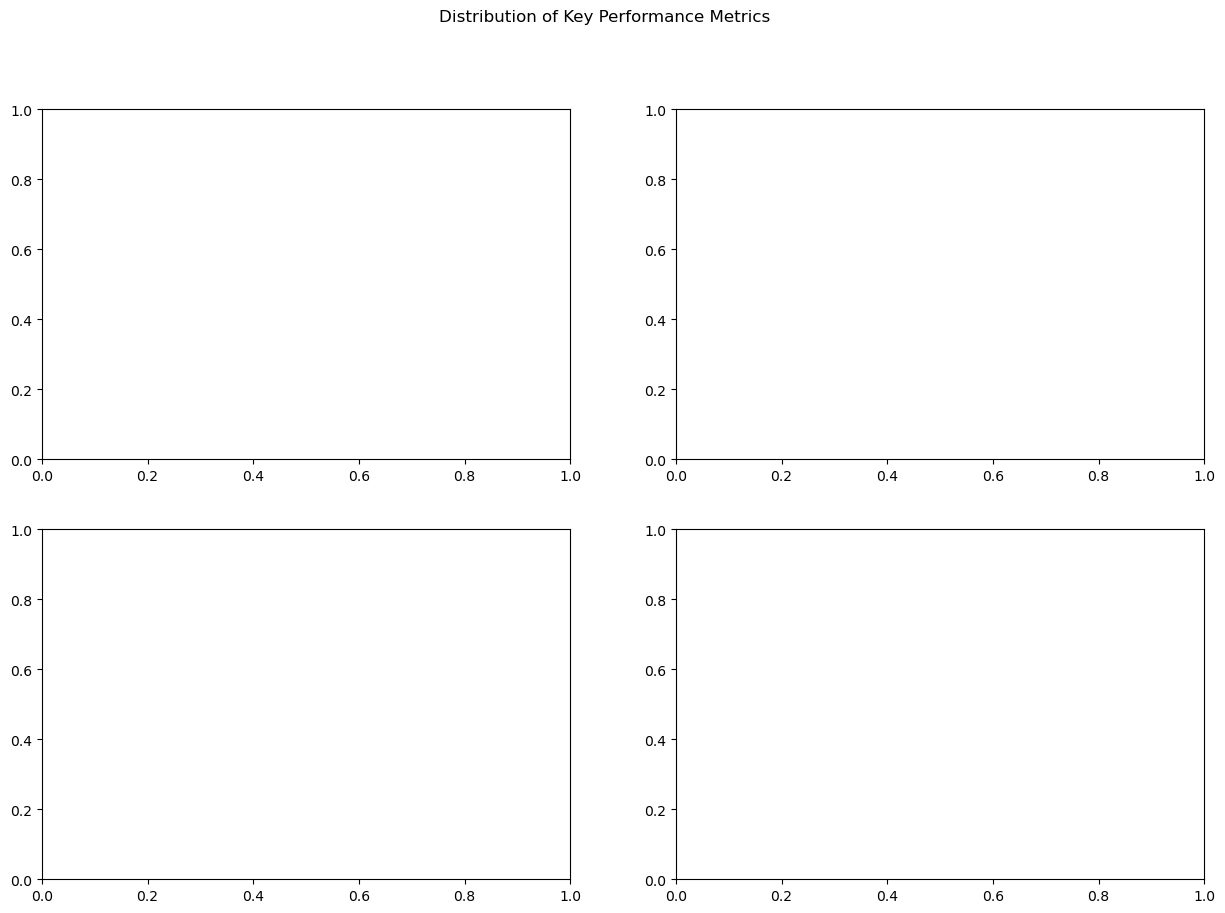

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Distribution of Key Performance Metrics")

sns.histplot(data=combined_stats_df, x='PTS', kde=True, ax=axes[0,0])
axes[0,0].set_title('Points Distribution')

sns.histplot(data=combined_stats_df, x='AST', kde=True, ax=axes[0,1])
axes[0,1].set_title('Assists Distribution')

sns.histplot(data=combined_stats_df, x='TRB', kde=True, ax=axes[1,0])
axes[1,0].set_title('Rebounds Distribution')

sns.histplot(data=combined_stats_df, x='MP/Game', kde=True, ax=axes[1,1])
axes[1,1].set_title('Minutes Played Distribution')

plt.tight_layout()
plt.show()

In [119]:
total_team_stats = pd.read_csv('./total_team_stats.csv')
total_team_stats.columns


Index(['Rk', 'Team', 'G', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P',
       '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [120]:
total_team_stats

,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1.0,CLE,11,2640,507,960,0.528,168,398,0.422,...,0.753,86,369,455,316,104,62,148,217,1350
1,2.0,MEM,11,2640,491,995,0.493,137,382,0.359,...,0.767,129,398,527,334,89,76,191,238,1330
2,3.0,BOS,11,2690,452,1004,0.450,204,564,0.362,...,0.829,113,365,478,263,87,52,131,180,1322
3,4.0,ATL,11,2640,456,983,0.464,139,396,0.351,...,0.777,121,347,468,308,111,57,172,218,1277
4,5.0,TOR,11,2690,478,1022,0.468,118,357,0.331,...,0.749,148,334,482,327,90,55,179,282,1268
5,6.0,GSW,10,2425,442,924,0.478,163,413,0.395,...,0.725,136,346,482,302,96,57,140,227,1213
6,7.0,DEN,10,2450,430,903,0.476,128,317,0.404,...,0.781,133,337,470,307,86,50,143,191,1209
7,8.0,ORL,11,2640,420,951,0.442,130,427,0.304,...,0.770,115,358,473,272,95,66,164,216,1188
8,9.0,DET,11,2640,439,944,0.465,129,381,0.339,...,0.763,120,384,504,263,57,63,190,230,1178
9,10.0,SAC,10,2450,430,888,0.484,103,337,0.306,...,0.845,91,346,437,244,86,44,136,206,1175
